In [37]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split

# Import ARIMA model.
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import VAR

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [58]:
data = pd.read_csv('data/g_logs_defense.csv')
data.shape

(103893, 35)

## VAR Model - James Harden 

In [301]:
df = data[data['Player'] == 'James Harden']
df.index = pd.DatetimeIndex(df['Date'])
df.drop(columns='Date',inplace=True)
df.sort_index(inplace=True)
df.head()

Season        Player Team             Match-up  Home/Away  W/L  \
Date                                                                          
2016-10-26  2016-17  James Harden  HOU   Los Angeles Lakers          1    0   
2016-10-28  2016-17  James Harden  HOU     Dallas Mavericks          1    1   
2016-10-30  2016-17  James Harden  HOU     Dallas Mavericks          0    1   
2016-11-01  2016-17  James Harden  HOU  Cleveland Cavaliers          1    0   
2016-11-02  2016-17  James Harden  HOU      New York Knicks          1    1   

            Min  Pts  FGM  FGA  ...  Trip/Dub  OPP_DEF_RTG  OPP_DREB%  \
Date                            ...                                     
2016-10-26   37   34    9   19  ...         0        112.0       71.7   
2016-10-28   36   26    9   18  ...         0        107.7       73.3   
2016-10-30   39   28    8   23  ...         0        107.7       73.3   
2016-11-01   38   41   13   20  ...         0        109.7       72.2   
2016-11-02   34   30    9   16  ...         0        110.7       69.8   

            OPP_STL  OPP_BLK  OPP_PTS_off_TOV  OPP_PTS_2nd_CHANCE  OPP_PTS_FB  \
Date                                                                            
2016-10-26      8.2      3.9             18.0                13.3        16.2   
2016-10-28      7.5      3.7             14.0                11.6        13.6   
2016-10-30      7.5      3.7             14.0                11.6        13.6   
2016-11-01      6.6      4.0             16.6                13.7        13.3   
2016-11-02      7.1      5.5             16.5                14.7        14.0   

            OPP_PTS_PAINT  DK_SCORE  
Date                                 
2016-10-26           47.4     68.75  
2016-10-28           39.5     48.75  
2016-10-30           39.5     48.25  
2016-11-01           44.5     77.75  
2016-11-02           46.1     66.50  

[5 rows x 34 columns]

In [302]:
df['DK_SCORE'].mean()

59.519672131147544

In [303]:
# Confirm Stationarity of the data 

def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:3], index=['Test Statistic','p-value', 'Lag Used'])
    return dfoutput

In [304]:
# Check if draftkings is stationary

interpret_dftest(adfuller(df['DK_SCORE']))

Test Statistic   -1.533463e+01
p-value           3.903869e-28
Lag Used          0.000000e+00
dtype: float64

In [305]:
# Check if points is stationary
interpret_dftest(adfuller(df['Pts']))

Test Statistic   -6.117902e+00
p-value           9.001353e-08
Lag Used          3.000000e+00
dtype: float64

In [306]:
# Check if rebounds is stationary
interpret_dftest(adfuller(df['REB']))

Test Statistic   -4.263454
p-value           0.000514
Lag Used          7.000000
dtype: float64

In [307]:
# Check if assists is stationary 
interpret_dftest(adfuller(df['AST']))

Test Statistic   -3.760148
p-value           0.003342
Lag Used          6.000000
dtype: float64

In [308]:
df = df[['DK_SCORE','Pts','REB','AST']]

df.dropna(inplace=True)
train, test = train_test_split(df,shuffle=False, test_size = .25)

model = VAR(train)

ts_model = model.fit(maxlags=5,ic='aic')

ts_model.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 11, Jan, 2021
Time:                     19:10:50
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    11.9394
Nobs:                     227.000    HQIC:                   11.7594
Log likelihood:          -2589.27    FPE:                    113289.
AIC:                      11.6377    Det(Omega_mle):         103834.
--------------------------------------------------------------------
Results for equation DK_SCORE
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              51.469976         4.440135           11.592           0.000
L1.DK_SCORE        -0.191662         0.271885           -0.705           0.481
L1.Pts              0.389077         0.320575            1.214   

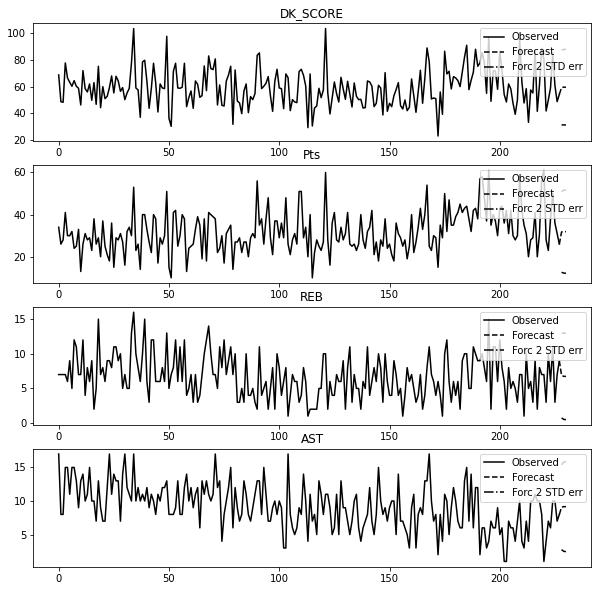

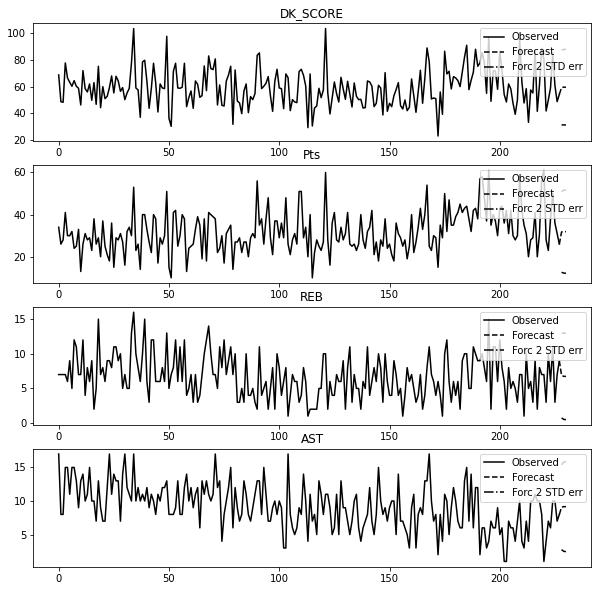

In [309]:
ts_model.plot_forecast(3)

In [310]:
forecast = ts_model.forecast(train.values, len(test))

In [311]:
for i in range(test.shape[1]):
    print(f'The test MSE on the {test.columns[i]} data is: {round(mean_squared_error(test.values[:, i], forecast[:, i]), 2)}')

The test MSE on the DK_SCORE data is: 210.86
The test MSE on the Pts data is: 119.61
The test MSE on the REB data is: 9.15
The test MSE on the AST data is: 9.92


In [312]:
next_game = ts_model.forecast(train.values, 1)

In [313]:
print(f'Draft Kings score projection: {round(next_game[0][0],2)}, Points projection: {round(next_game[0][1],2)},\
Rebounds projection: {round(next_game[0][2],2)}, Assists projection: {round(next_game[0][3],2)}')

Draft Kings score projection: 59.31, Points projection: 31.76,Rebounds projection: 6.87, Assists projection: 9.07


## VAR Model - Carmelo Anthony

In [314]:
df_2 = data[data['Player'] == 'Carmelo Anthony']
df_2.index = pd.DatetimeIndex(df_2['Date'])
df_2.drop(columns='Date',inplace=True)
df_2.sort_index(inplace=True)
df_2.head()

Season           Player Team           Match-up  Home/Away  W/L  \
Date                                                                           
2016-10-29  2016-17  Carmelo Anthony  NYK  Memphis Grizzlies          0    1   
2016-11-01  2016-17  Carmelo Anthony  NYK    Detroit Pistons          1    0   
2016-11-02  2016-17  Carmelo Anthony  NYK    Houston Rockets          0    0   
2016-11-04  2016-17  Carmelo Anthony  NYK      Chicago Bulls          1    1   
2016-11-06  2016-17  Carmelo Anthony  NYK          Utah Jazz          0    0   

            Min  Pts  FGM  FGA  ...  Trip/Dub  OPP_DEF_RTG  OPP_DREB%  \
Date                            ...                                     
2016-10-29   36   20    5   15  ...         0        106.5       73.1   
2016-11-01   35   24    8   17  ...         0        106.7       77.5   
2016-11-02   31   21    8   15  ...         0        108.4       71.7   
2016-11-04   36   25    9   22  ...         0        106.2       73.3   
2016-11-06   35   28   12   20  ...         0        104.7       74.3   

            OPP_STL  OPP_BLK  OPP_PTS_off_TOV  OPP_PTS_2nd_CHANCE  OPP_PTS_FB  \
Date                                                                            
2016-10-29      8.0      4.2             14.8                11.5        14.6   
2016-11-01      7.0      3.8             12.7                10.1        10.7   
2016-11-02      8.2      4.3             17.5                13.8        14.3   
2016-11-04      7.8      4.8             15.5                11.9        13.7   
2016-11-06      6.7      5.0             15.2                10.7        10.5   

            OPP_PTS_PAINT  DK_SCORE  
Date                                 
2016-10-29           37.8     34.00  
2016-11-01           41.2     36.00  
2016-11-02           49.0     31.25  
2016-11-04           45.2     42.25  
2016-11-06           41.0     43.25  

[5 rows x 34 columns]

In [315]:
df_2['DK_SCORE'].mean()

30.58920704845815

In [316]:
interpret_dftest(adfuller(df_2['DK_SCORE'].diff(1).dropna()))

Test Statistic   -1.043276e+01
p-value           1.594913e-18
Lag Used          8.000000e+00
dtype: float64

In [317]:
interpret_dftest(adfuller(df_2['Pts'].diff(1).dropna()))

Test Statistic   -8.593566e+00
p-value           7.177329e-14
Lag Used          9.000000e+00
dtype: float64

In [318]:
interpret_dftest(adfuller(df_2['REB']))

Test Statistic   -9.632094e+00
p-value           1.602099e-16
Lag Used          2.000000e+00
dtype: float64

In [319]:
interpret_dftest(adfuller(df_2['AST'].diff(1).dropna()))

Test Statistic   -6.199360e+00
p-value           5.858357e-08
Lag Used          1.200000e+01
dtype: float64

In [320]:
df_2['DK_SCORE_first_diff'] = df_2['DK_SCORE'].diff(1)
df_2['Pts_first_diff'] = df_2['Pts'].diff(1)
df_2['AST_first_diff'] = df_2['AST'].diff(1)

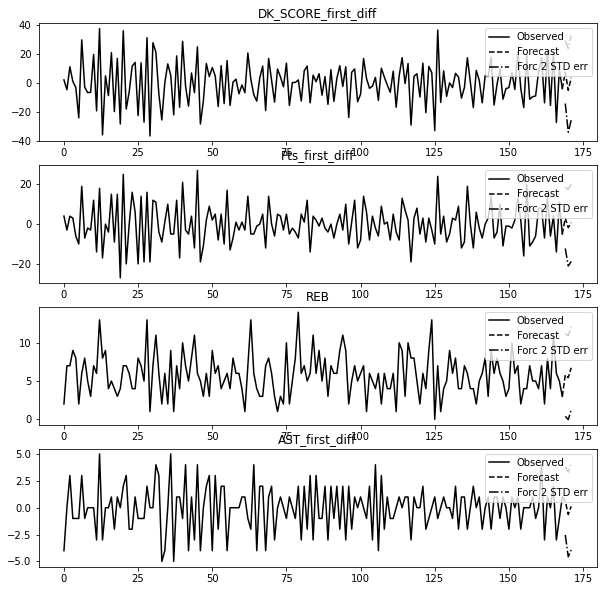

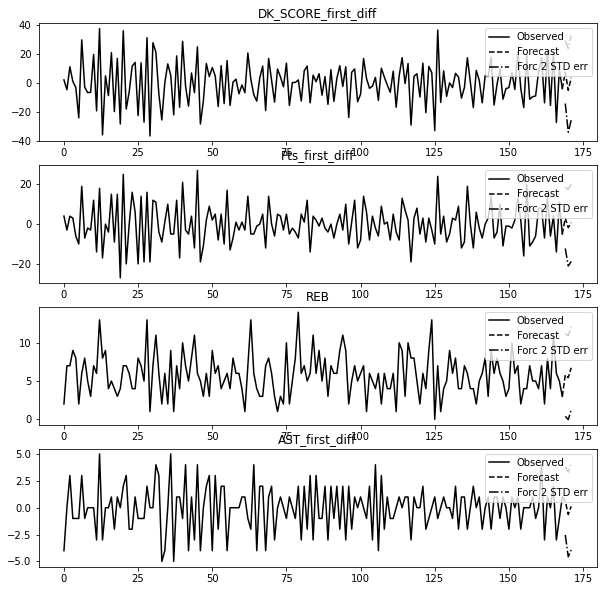

In [321]:
df_2 = df_2[['DK_SCORE_first_diff','Pts_first_diff','REB','AST_first_diff']]

df_2.dropna(inplace=True)
train, test = train_test_split(df_2,shuffle=False, test_size = .25)

model = VAR(train)

ts_model = model.fit(maxlags=5,ic='aic')

ts_model.plot_forecast(3)

In [322]:
forecast = ts_model.forecast(train.values, len(test))

for i in range(test.shape[1]):
    print(f'The test MSE on the {test.columns[i]} data is: {round(mean_squared_error(test.values[:, i], forecast[:, i]), 2)}')

The test MSE on the DK_SCORE_first_diff data is: 205.31
The test MSE on the Pts_first_diff data is: 101.58
The test MSE on the REB data is: 9.04
The test MSE on the AST_first_diff data is: 5.27


In [323]:
ts_model.forecast(train.values, 1)

array([[7.42126829, 3.06244171, 5.80109143, 0.61933336]])